In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

# Этапы тупая сука

## EDA
## Без привлечения ML
## RFM
## ABC
## С привлечением ML
## DBScan
## KNN, Tree, Random Forest, Logistic Regression
## Финал

In [2]:
data = pd.read_csv('marketing_campaign.csv', sep='\t', index_col='ID').sort_values(by='ID')

In [3]:
data.head(10).T

ID,0,1,9,13,17,20,22,24,25,35
Year_Birth,1985,1961,1975,1947,1971,1965,1976,1960,1958,1987
Education,Graduation,Graduation,Master,PhD,PhD,2n Cycle,Graduation,Master,Graduation,Graduation
Marital_Status,Married,Single,Single,Widow,Married,Married,Divorced,Together,Married,Married
Income,70951.0,57091.0,46098.0,25358.0,60491.0,46891.0,46310.0,17144.0,65148.0,25545.0
Kidhome,0,0,1,0,0,0,1,1,0,1
Teenhome,0,0,1,1,1,1,0,1,1,0
Dt_Customer,04-05-2013,15-06-2014,18-08-2012,22-07-2013,06-09-2013,01-09-2013,03-12-2012,15-02-2014,16-11-2012,08-09-2012
Recency,66,0,86,57,81,91,99,96,9,35
MntWines,239,464,57,19,637,43,185,18,460,32
MntFruits,10,5,0,0,47,12,2,2,35,1


In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0
MntSweetProducts,2240.0,27.062946,41.280498,0.0,1.00,8.0,33.00,263.0


<Axes: >

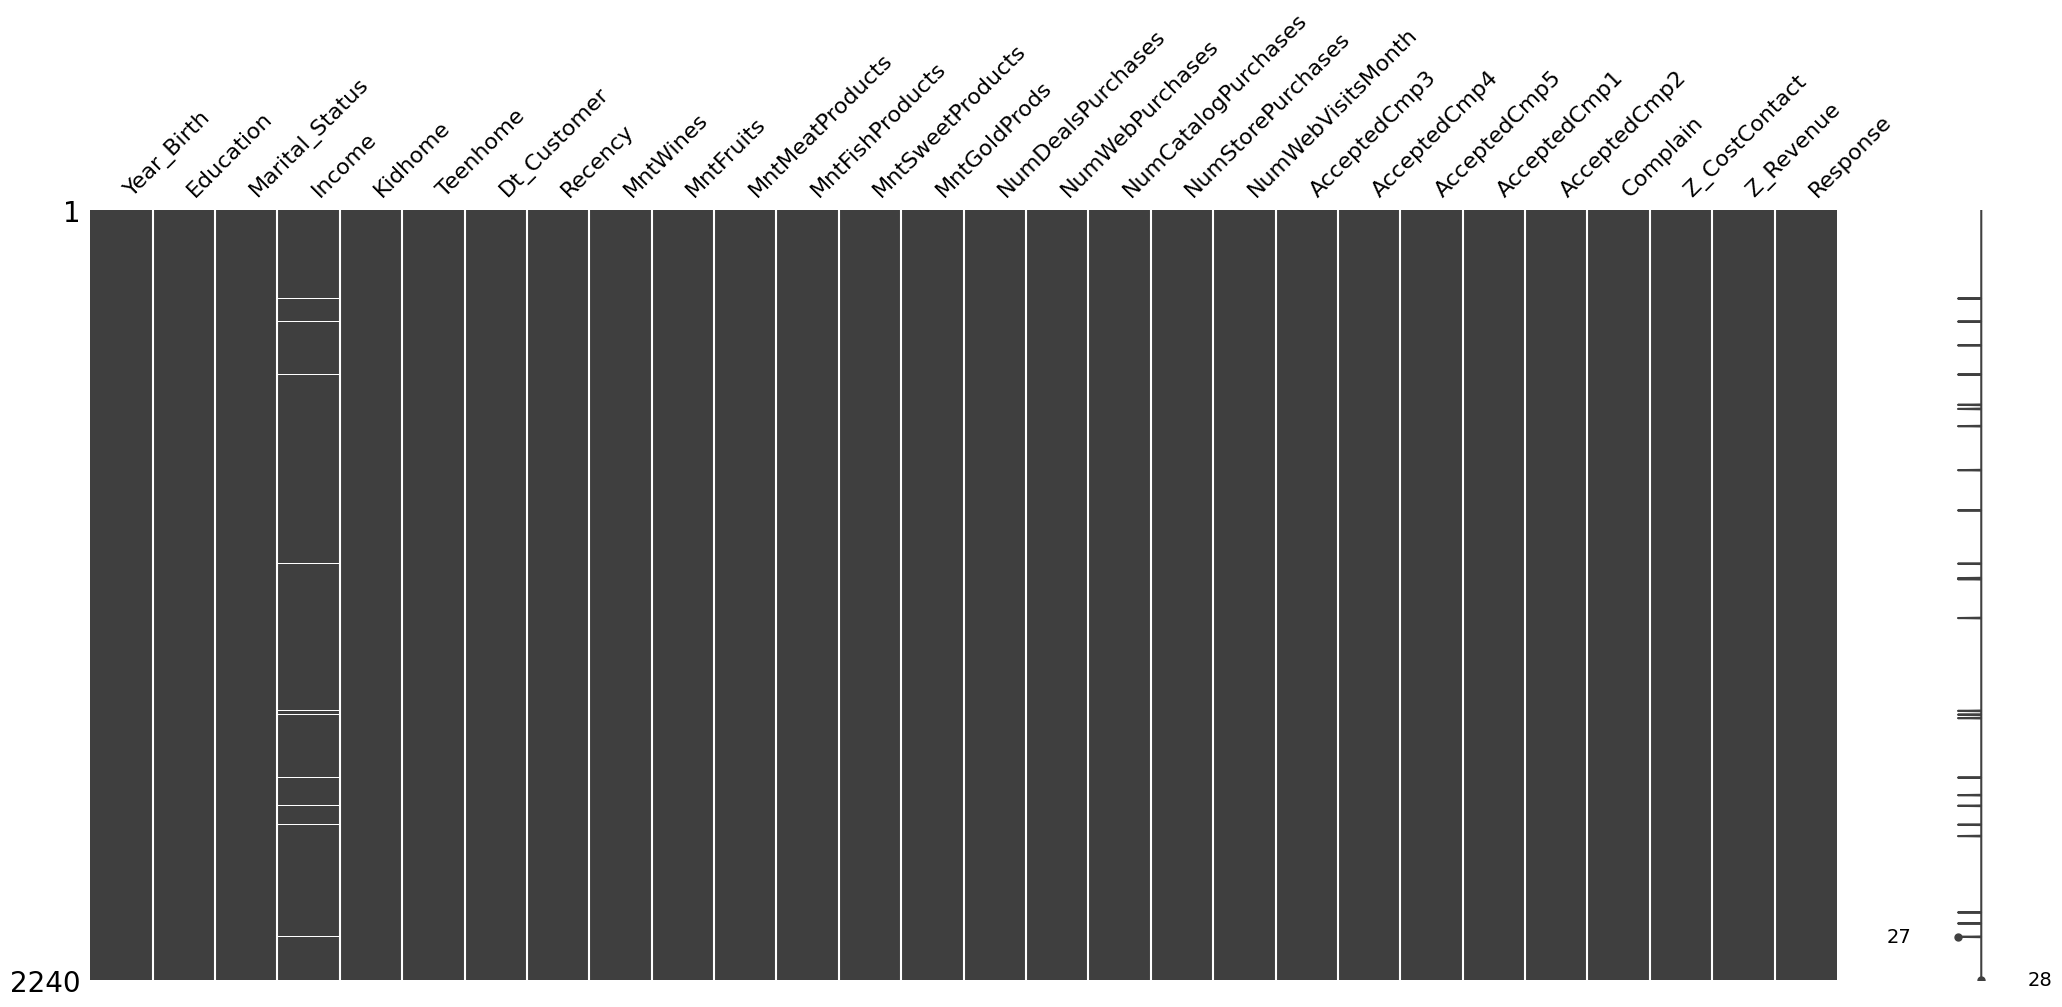

In [5]:
msno.matrix(data)

In [6]:
data.isna().sum()

Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [7]:
data = data.dropna()

In [8]:
data = data.drop_duplicates()

In [9]:
data

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
ID,,,,,,,,,,,,,,,,,,,,,
0,1985,Graduation,Married,70951.0,0,0,04-05-2013,66,239,10,...,1,0,0,0,0,0,0,3,11,0
1,1961,Graduation,Single,57091.0,0,0,15-06-2014,0,464,5,...,5,0,0,0,0,1,0,3,11,1
9,1975,Master,Single,46098.0,1,1,18-08-2012,86,57,0,...,8,0,0,0,0,0,0,3,11,0
13,1947,PhD,Widow,25358.0,0,1,22-07-2013,57,19,0,...,6,0,0,0,0,0,0,3,11,0
17,1971,PhD,Married,60491.0,0,1,06-09-2013,81,637,47,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11176,1970,PhD,Together,65968.0,0,1,12-05-2014,12,376,9,...,3,0,0,0,0,0,0,3,11,0
11178,1972,Master,Single,42394.0,1,0,23-03-2014,69,15,2,...,7,0,0,0,0,0,0,3,11,0
11181,1949,PhD,Married,156924.0,0,0,29-08-2013,85,2,1,...,0,0,0,0,0,0,0,3,11,0


In [10]:
#функция очистки данных от шума по квантилям
def filter_by_quantiles(dataset, quantile1, quantile2):
    quantile_df = dataset.select_dtypes(include=[np.number]).quantile([quantile1, quantile2])
    for column in quantile_df:
        dataset = dataset[(dataset[column] >= quantile_df[column][quantile1]) & (dataset[column] <= quantile_df[column][quantile2])]
    return dataset

In [11]:
data = filter_by_quantiles(data, 0.01, 0.99)

In [12]:
data = data[(data.Marital_Status!='YOLO') & (data.Marital_Status!='Absurd')]

In [13]:
data = data.drop(['Z_CostContact', 'Z_Revenue', 'Complain'], axis=1)

In [14]:
data.Income.describe()

count     1808.000000
mean     50311.190819
std      19498.827534
min       7500.000000
25%      34735.500000
50%      49679.500000
75%      65687.500000
max      94472.000000
Name: Income, dtype: float64

In [15]:
data['Income'] = pd.cut(data.Income, bins=[-1, 34788, 49678, 65675, 100000], labels=['Poor', 'Middle', 'Rich', 'Very rich'])

In [16]:
data.Dt_Customer = pd.to_datetime(data.Dt_Customer, format='%d-%m-%Y')

<Axes: xlabel='Dt_Customer', ylabel='Count'>

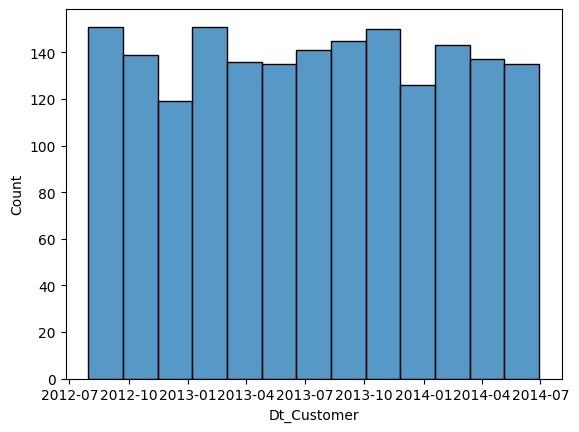

In [17]:
sns.histplot(data.Dt_Customer)

In [18]:
data.Dt_Customer.max()

Timestamp('2014-06-29 00:00:00')

In [19]:
#контрольной точкой для нас будет 1 июля, мы уславливаемся, что это дата проведения анализа

In [20]:
#создаём 2 новые фичи - сумма всех покупок за 2 года и количество покупок, совершённых разными способами
#Зачем?
#У нас задача кластеризации, а один из способов, не прибегая к ML, это RFM-анализ
#где:
#R - давность покупок
#F - частота
#M - сумма покупок
#по результатам RFM-анализа мы получим 9 фичей, по которым можно будет судить о наших клиенатх

In [21]:
#попутно выведем давность регистрации, чтобы понимать кто наши постоянные покупатели, а кто новичок
data['Registration_date'] = (pd.to_datetime('2014-07-01') - data.Dt_Customer).dt.days

In [22]:
data = data.drop('Dt_Customer', axis=1)

In [23]:
data['Amount_of_purchases'] = data.MntFishProducts + data.MntFruits + data.MntGoldProds\
                            + data.MntMeatProducts + data.MntSweetProducts + data.MntWines

In [24]:
data.Amount_of_purchases.describe()

count    1808.000000
mean      550.182522
std       561.880673
min         8.000000
25%        67.000000
50%       324.000000
75%       950.250000
max      2525.000000
Name: Amount_of_purchases, dtype: float64

In [25]:
data['Amount_of_purchases'] = pd.cut(data.Amount_of_purchases, bins=[-1, 67, 324, 3000], labels=[1, 2, 3])

<Axes: xlabel='Amount_of_purchases', ylabel='Count'>

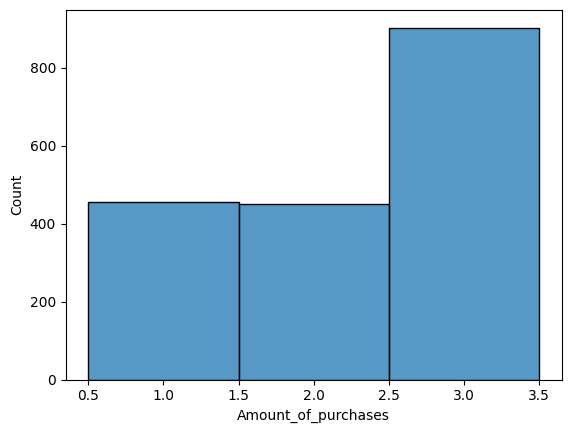

In [26]:
sns.histplot(data.Amount_of_purchases)

In [27]:
#мы делим всё покупки на количество дней с момента регистрации
data['Frequency'] = (data.NumWebPurchases + data.NumCatalogPurchases + data.NumStorePurchases) / data.Registration_date

In [28]:
data.Frequency.describe()

count    1808.000000
mean        0.089614
std         0.329744
min         0.004298
25%         0.018892
50%         0.035049
75%         0.064064
max         8.000000
Name: Frequency, dtype: float64

In [29]:
data['Frequency'] = pd.cut(data.Frequency, bins=[-1, 0.01, 0.035, 10], labels=[1, 2, 3])

<Axes: xlabel='Frequency', ylabel='Count'>

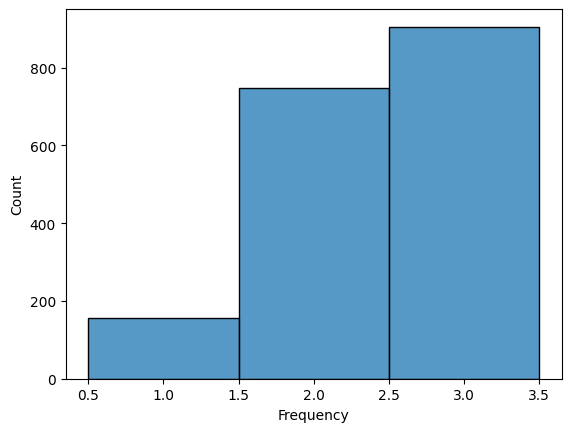

In [30]:
sns.histplot(data.Frequency)

In [31]:
data.Recency.describe()

count    1808.000000
mean       48.952434
std        28.751823
min         0.000000
25%        24.000000
50%        49.000000
75%        74.000000
max        98.000000
Name: Recency, dtype: float64

In [32]:
data['Recency'] = pd.cut(data.Recency, bins=[-1, 24, 49, 100], labels=[1, 2, 3])

<Axes: xlabel='Recency', ylabel='Count'>

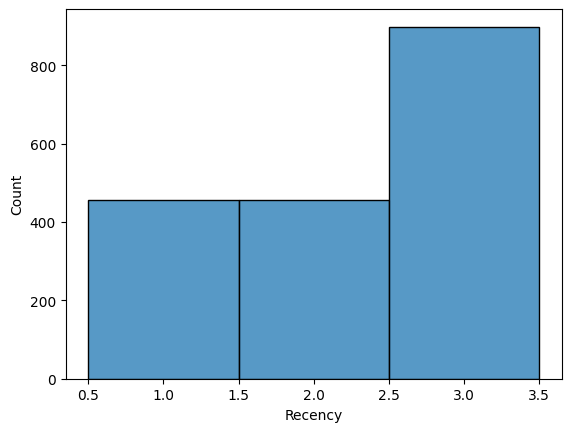

In [33]:
sns.histplot(data.Recency)

In [34]:
data.head(50).T

ID,1,9,13,17,20,24,25,35,48,49,...,241,246,247,252,254,257,263,269,271,273
Year_Birth,1961,1975,1947,1971,1965,1960,1958,1987,1964,1970,...,1952,1965,1971,1963,1955,1959,1945,1963,1969,1970
Education,Graduation,Master,PhD,PhD,2n Cycle,Master,Graduation,Graduation,Graduation,Graduation,...,Graduation,Graduation,Graduation,PhD,Graduation,PhD,PhD,PhD,Graduation,Master
Marital_Status,Single,Single,Widow,Married,Married,Together,Married,Married,Together,Single,...,Together,Married,Married,Divorced,Together,Married,Single,Single,Widow,Married
Income,Rich,Middle,Poor,Rich,Middle,Poor,Rich,Poor,Rich,Poor,...,Very rich,Very rich,Middle,Middle,Rich,Very rich,Middle,Middle,Middle,Middle
Kidhome,0,1,0,0,0,1,0,1,0,1,...,0,1,1,0,0,0,0,0,1,1
Teenhome,0,1,1,1,1,1,1,0,1,0,...,0,1,0,0,1,1,0,1,1,1
Recency,1,3,3,3,3,3,1,2,3,2,...,3,3,1,1,1,3,1,3,2,2
MntWines,464,57,19,637,43,18,460,32,136,2,...,901,199,172,123,399,952,56,777,154,130
MntFruits,5,0,0,47,12,2,35,1,1,3,...,31,9,10,133,4,12,19,30,0,0
MntMeatProducts,64,27,5,237,23,19,422,64,12,6,...,345,57,125,142,30,180,29,163,50,16


In [35]:
#RFM-анализ строится на 3 фичах - давность последней покупки, сумма покупок, частота

In [36]:
RFM_data = data[['Recency', 'Amount_of_purchases', 'Frequency']].copy()

In [37]:
def RFM_loyalty(r, f, m):
    temp = list()
    for i in RFM_data.index:
        if r[i] == 1:
            if f[i] == 1:
                temp.append('Lost')
            else:
                temp.append('Loyal customers who have lost activity')
        elif r[i] == 2:
            if 1<=f[i]<=2:
                temp.append('Sleeping')
            else:
                temp.append('loyal sleeping customers')
        else:
            if f[i] == 1:
                temp.append('Beginners')
            elif f[i] == 2:
                temp.append('Developing')
            else:
                temp.append('Regular customers')
    return temp

In [38]:
RFM_data['Loyalty'] = RFM_loyalty(RFM_data.loc[:, 'Recency'], \
                                        RFM_data.loc[:, 'Frequency'], RFM_data.loc[:, 'Amount_of_purchases'])

In [39]:
loaylty = RFM_data.Loyalty.value_counts()

In [40]:
loaylty

Loyalty
Regular customers                         454
Loyal customers who have lost activity    420
Developing                                366
Sleeping                                  229
loyal sleeping customers                  226
Beginners                                  78
Lost                                       35
Name: count, dtype: int64

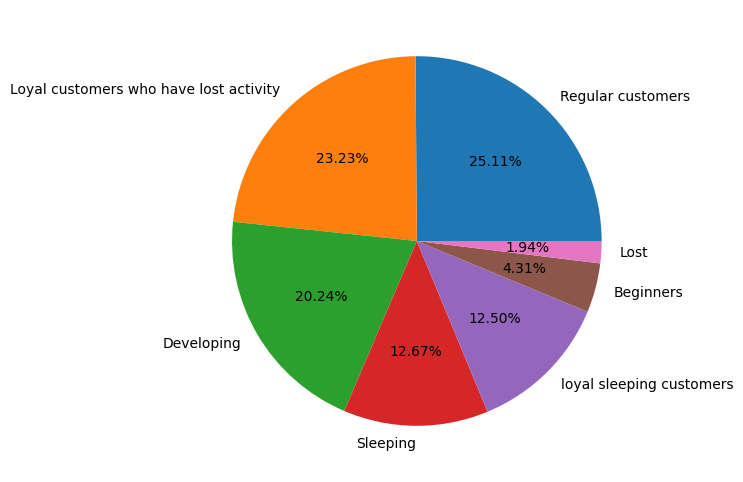

In [41]:
plt.figure(figsize=(8, 6))
plt.pie(x=loaylty.values, labels=loaylty.index, autopct='%.2f%%')
plt.show()

# ABC-анализ клиентов

In [42]:
data['Sum'] = data.MntFishProducts+data.MntFruits+data.MntGoldProds+data.MntMeatProducts+data.MntSweetProducts+data.MntWines

In [43]:
data = data.sort_values(by='Sum', ascending=False)

In [44]:
data['Part'] = data['Sum']/data['Sum'].sum()*100

In [45]:
data['Cum_part']=data['Part'].cumsum()

In [46]:
data

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Registration_date,Amount_of_purchases,Frequency,Sum,Part,Cum_part
ID,,,,,,,,,,,,,,,,,,,,,
5350,1991,Master,Single,Very rich,0,0,2,1156,120,915,...,1,0,0,1,138,3,3,2525,0.253838,0.253838
5735,1991,Master,Single,Very rich,0,0,2,1156,120,915,...,1,0,0,0,138,3,3,2525,0.253838,0.507675
1763,1988,Graduation,Together,Very rich,0,0,3,1259,172,815,...,1,1,0,1,339,3,3,2524,0.253737,0.761413
9010,1972,Master,Married,Very rich,0,0,3,968,147,842,...,1,1,0,1,506,3,3,2346,0.235843,0.997256
5386,1953,Graduation,Together,Very rich,0,0,3,1111,24,790,...,1,1,0,1,484,3,3,2302,0.231420,1.228675
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4298,1973,PhD,Together,Poor,1,0,3,5,0,4,...,0,0,0,0,99,1,2,10,0.001005,99.996280
7788,1983,PhD,Married,Poor,1,0,3,6,0,3,...,0,0,0,0,27,1,3,10,0.001005,99.997286
6528,1982,Master,Together,Poor,1,0,3,2,2,2,...,0,0,0,0,26,1,3,10,0.001005,99.998291


In [47]:
data['ABC-group'] = data['Cum_part'].apply(lambda x: 'A' if x < 80 else ('B' if 80 <= x < 95 else 'C'))

In [48]:
abc = data['ABC-group'].value_counts()

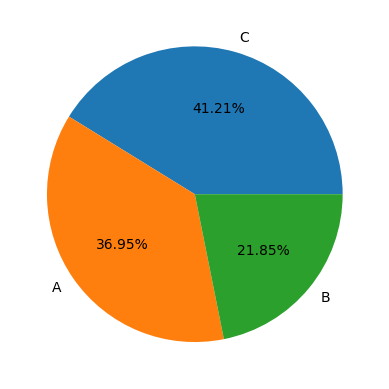

In [49]:
plt.pie(x=abc.values, labels=abc.index, autopct='%.2f%%')
plt.show()

In [50]:
data

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp1,AcceptedCmp2,Response,Registration_date,Amount_of_purchases,Frequency,Sum,Part,Cum_part,ABC-group
ID,,,,,,,,,,,,,,,,,,,,,
5350,1991,Master,Single,Very rich,0,0,2,1156,120,915,...,0,0,1,138,3,3,2525,0.253838,0.253838,A
5735,1991,Master,Single,Very rich,0,0,2,1156,120,915,...,0,0,0,138,3,3,2525,0.253838,0.507675,A
1763,1988,Graduation,Together,Very rich,0,0,3,1259,172,815,...,1,0,1,339,3,3,2524,0.253737,0.761413,A
9010,1972,Master,Married,Very rich,0,0,3,968,147,842,...,1,0,1,506,3,3,2346,0.235843,0.997256,A
5386,1953,Graduation,Together,Very rich,0,0,3,1111,24,790,...,1,0,1,484,3,3,2302,0.231420,1.228675,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4298,1973,PhD,Together,Poor,1,0,3,5,0,4,...,0,0,0,99,1,2,10,0.001005,99.996280,C
7788,1983,PhD,Married,Poor,1,0,3,6,0,3,...,0,0,0,27,1,3,10,0.001005,99.997286,C
6528,1982,Master,Together,Poor,1,0,3,2,2,2,...,0,0,0,26,1,3,10,0.001005,99.998291,C


In [51]:
data = data.drop(['Part', 'Cum_part', 'Sum'], axis=1)

In [52]:
data.head(10).T

ID,5350,5735,1763,9010,5386,2186,1173,6248,7503,477
Year_Birth,1991,1991,1988,1972,1953,1977,1947,1947,1976,1986
Education,Master,Master,Graduation,Master,Graduation,2n Cycle,Master,Master,Graduation,Graduation
Marital_Status,Single,Single,Together,Married,Together,Together,Together,Single,Single,Married
Income,Very rich,Very rich,Very rich,Very rich,Very rich,Very rich,Very rich,Very rich,Very rich,Very rich
Kidhome,0,0,0,0,0,0,0,0,0,0
Teenhome,0,0,0,0,0,0,0,0,0,0
Recency,2,2,3,3,3,2,3,2,2,2
MntWines,1156,1156,1259,968,1111,938,1200,1276,1032,1060
MntFruits,120,120,172,147,24,142,105,24,105,61
MntMeatProducts,915,915,815,842,790,754,758,746,779,835


# Предобработка данных для дальнейшего ML
### Начнём с даты рождения. Несомнено, что поколения по разному относят к покупкам, поэтому мы проведём бининг по 10 лет 

<Axes: xlabel='Year_Birth', ylabel='Count'>

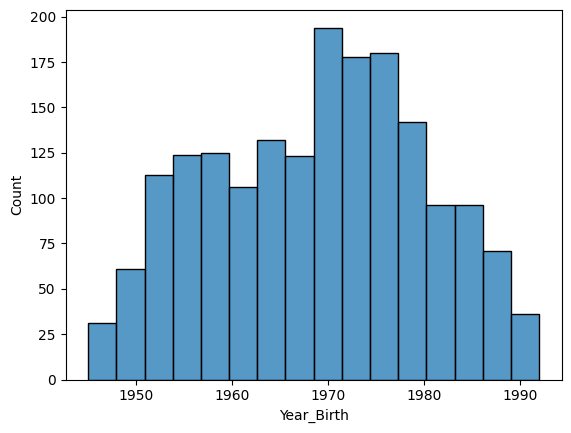

In [53]:
sns.histplot(data.Year_Birth)

In [54]:
data['Year_Birth'] = pd.cut(data.Year_Birth, bins=[-1, 1950, 1960, 1970, 1980, 1990, 2000], labels=[1, 2, 3, 4, 5, 6])

<Axes: xlabel='Year_Birth', ylabel='Count'>

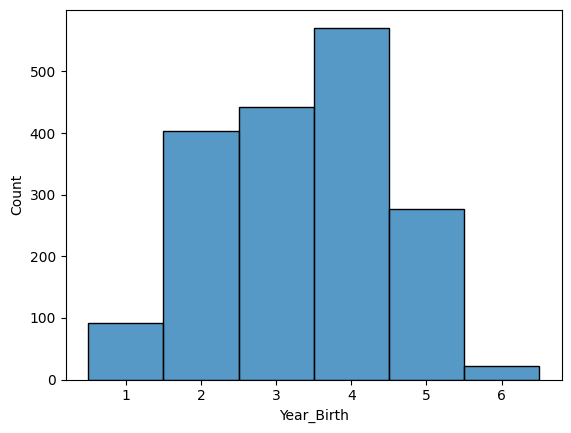

In [55]:
sns.histplot(data.Year_Birth)

# Дальше у нас идут 6 фичей о сумме позиций купленных за 2 года. Для модели, да и для нас тоже посчитаем сколько в среднем тратить человек на каждую позицию в день

In [56]:
data.MntFishProducts = data.MntFishProducts / 730
data.MntFruits = data.MntFruits / 730
data.MntGoldProds = data.MntGoldProds / 730
data.MntMeatProducts = data.MntMeatProducts / 730
data.MntSweetProducts = data.MntSweetProducts / 730
data.MntWines = data.MntWines / 730

<Axes: xlabel='MntSweetProducts', ylabel='Count'>

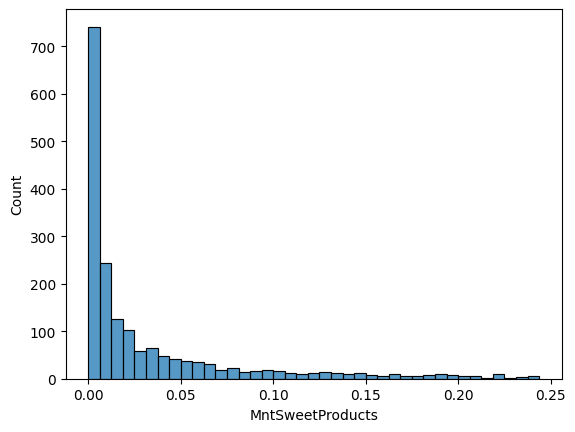

In [57]:
sns.histplot(data.MntSweetProducts)

# У нас есть интересная фича - количество покупок со скидкой. Мы можем посчитать какую долю она составляет от общего числа покупок и таким образом разделить пользователей на несколько групп по экономности

In [58]:
data['discount_lover'] = data.NumDealsPurchases / (data.NumWebPurchases+data.NumStorePurchases+data.NumCatalogPurchases)

<Axes: xlabel='discount_lover', ylabel='Count'>

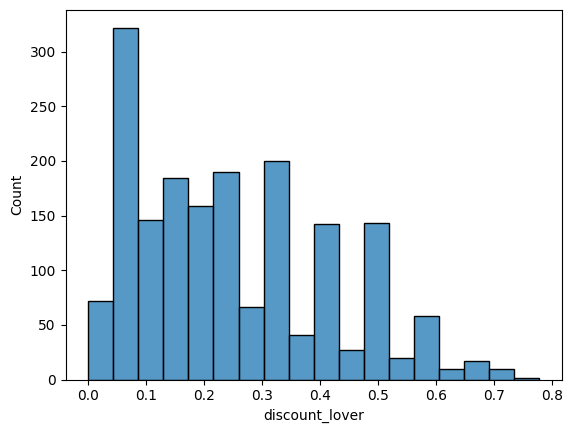

In [59]:
sns.histplot(data.discount_lover)

# Разделим по 4 категориям с помощью квантилей

In [60]:
data['discount_lover'] = pd.cut(data['discount_lover'], bins=[-1, 0.2, 0.4, 0.6, 1], labels=['Не обращает внимания', 'Часть покупок со скидкой', 'Чаще берёт со скидкой', 'Покупает только со скидкой'])

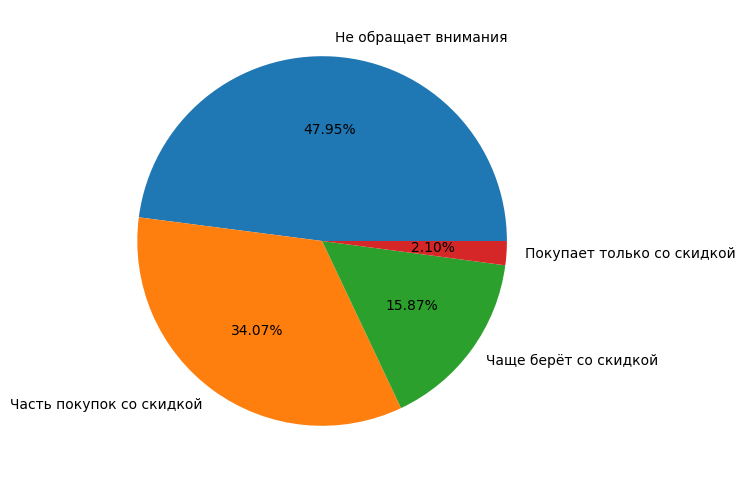

In [61]:
disc_lover = data.discount_lover.value_counts()
plt.figure(figsize=(8, 6))
plt.pie(x=disc_lover.values, labels=disc_lover.index, autopct='%.2f%%')
plt.show()

# Конверсия сайта
## Берём количество покупок с сайта и делим на количество посещений сайта

In [62]:
data['web_conv'] = (data.NumWebPurchases/24) / data.NumWebVisitsMonth

<Axes: xlabel='web_conv', ylabel='Count'>

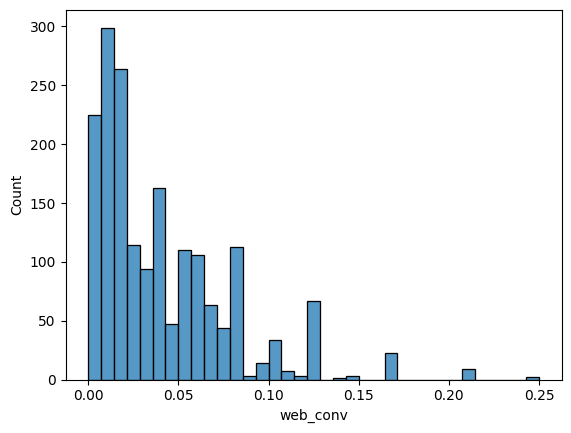

In [63]:
sns.histplot(data.web_conv)

In [64]:
data.head(5).T

ID,5350,5735,1763,9010,5386
Year_Birth,6,6,5,4,2
Education,Master,Master,Graduation,Master,Graduation
Marital_Status,Single,Single,Together,Married,Together
Income,Very rich,Very rich,Very rich,Very rich,Very rich
Kidhome,0,0,0,0,0
Teenhome,0,0,0,0,0
Recency,2,2,3,3,3
MntWines,1.583562,1.583562,1.724658,1.326027,1.521918
MntFruits,0.164384,0.164384,0.235616,0.20137,0.032877
MntMeatProducts,1.253425,1.253425,1.116438,1.153425,1.082192


In [65]:
pd.get_dummies(data[['Education', 'Marital_Status', 'Income', 'discount_lover', 'ABC-group']])

,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,...,Income_Middle,Income_Rich,Income_Very rich,discount_lover_Не обращает внимания,discount_lover_Часть покупок со скидкой,discount_lover_Чаще берёт со скидкой,discount_lover_Покупает только со скидкой,ABC-group_A,ABC-group_B,ABC-group_C
ID,,,,,,,,,,,,,,,,,,,,,
5350,False,False,False,True,False,False,False,False,True,False,...,False,False,True,True,False,False,False,True,False,False
5735,False,False,False,True,False,False,False,False,True,False,...,False,False,True,True,False,False,False,True,False,False
1763,False,False,True,False,False,False,False,False,False,True,...,False,False,True,True,False,False,False,True,False,False
9010,False,False,False,True,False,False,False,True,False,False,...,False,False,True,True,False,False,False,True,False,False
5386,False,False,True,False,False,False,False,False,False,True,...,False,False,True,True,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4298,False,False,False,False,True,False,False,False,False,True,...,False,False,False,False,True,False,False,False,False,True
7788,False,False,False,False,True,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,True
6528,False,False,False,True,False,False,False,False,False,True,...,False,False,False,False,True,False,False,False,False,True


In [66]:
data = pd.concat([data, pd.get_dummies(data[['Education', 'Marital_Status', 'Income', 'discount_lover', 'ABC-group']])], axis=1)

In [67]:
data = data.drop(['Education', 'Marital_Status', 'Income', 'discount_lover', 'ABC-group'], axis=1)

In [68]:
data.head(5).T

ID,5350,5735,1763,9010,5386
Year_Birth,6,6,5,4,2
Kidhome,0,0,0,0,0
Teenhome,0,0,0,0,0
Recency,2,2,3,3,3
MntWines,1.583562,1.583562,1.724658,1.326027,1.521918
MntFruits,0.164384,0.164384,0.235616,0.20137,0.032877
MntMeatProducts,1.253425,1.253425,1.116438,1.153425,1.082192
MntFishProducts,0.128767,0.128767,0.132877,0.187671,0.219178
MntSweetProducts,0.19726,0.19726,0.20274,0.057534,0.061644
MntGoldProds,0.131507,0.131507,0.045205,0.287671,0.235616


In [69]:
data = data.astype('float64')

In [70]:
data.head().T

ID,5350,5735,1763,9010,5386
Year_Birth,6.000000,6.000000,5.000000,4.000000,2.000000
Kidhome,0.000000,0.000000,0.000000,0.000000,0.000000
Teenhome,0.000000,0.000000,0.000000,0.000000,0.000000
Recency,2.000000,2.000000,3.000000,3.000000,3.000000
MntWines,1.583562,1.583562,1.724658,1.326027,1.521918
MntFruits,0.164384,0.164384,0.235616,0.201370,0.032877
MntMeatProducts,1.253425,1.253425,1.116438,1.153425,1.082192
MntFishProducts,0.128767,0.128767,0.132877,0.187671,0.219178
MntSweetProducts,0.197260,0.197260,0.202740,0.057534,0.061644
MntGoldProds,0.131507,0.131507,0.045205,0.287671,0.235616


In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1808 entries, 5350 to 10104
Data columns (total 47 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Year_Birth                                 1808 non-null   float64
 1   Kidhome                                    1808 non-null   float64
 2   Teenhome                                   1808 non-null   float64
 3   Recency                                    1808 non-null   float64
 4   MntWines                                   1808 non-null   float64
 5   MntFruits                                  1808 non-null   float64
 6   MntMeatProducts                            1808 non-null   float64
 7   MntFishProducts                            1808 non-null   float64
 8   MntSweetProducts                           1808 non-null   float64
 9   MntGoldProds                               1808 non-null   float64
 10  NumDealsPurchases        

In [72]:
from sklearn.cluster import KMeans
KMModel = KMeans(n_clusters=10)
KMModel.fit(data)

c:\python\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=10)

In [73]:
pred = KMModel.predict(data)

In [75]:
pred_val = pd.Series(pred).value_counts()

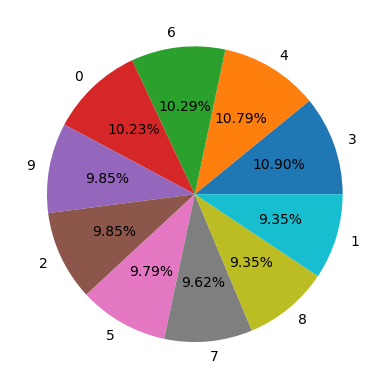

In [76]:
plt.pie(x=pred_val.values, labels=pred_val.index, autopct='%.2f%%')
plt.show()

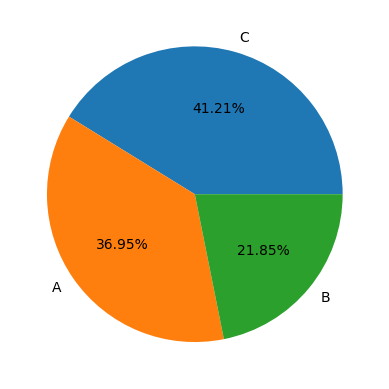

In [77]:
plt.pie(x=abc.values, labels=abc.index, autopct='%.2f%%')
plt.show()

In [78]:
from sklearn.manifold import TSNE

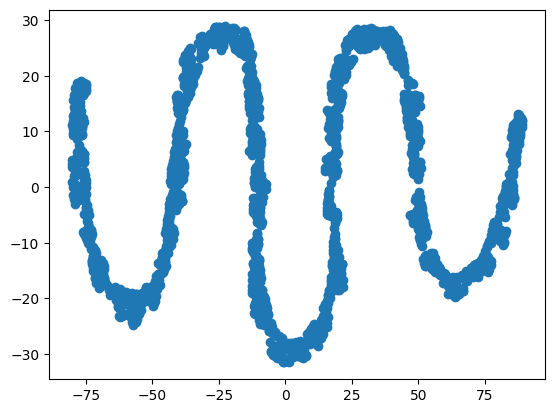

In [79]:
model = TSNE(learning_rate=200)

# Обучаем модель
transformed = model.fit_transform(data)

# Представляем результат в двумерных координатах
x_axis = transformed[:, 0]
y_axis = transformed[:, 1]

plt.scatter(x_axis, y_axis)
plt.show()

In [80]:
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA

In [81]:
# Определяем модель
dbscan = DBSCAN()

# Обучаем
dbscan.fit(data)

DBSCAN()

In [85]:
pca = PCA(n_components=10).fit(data)
pca_2d = pca.transform(data)

NameError: name 'c1' is not defined

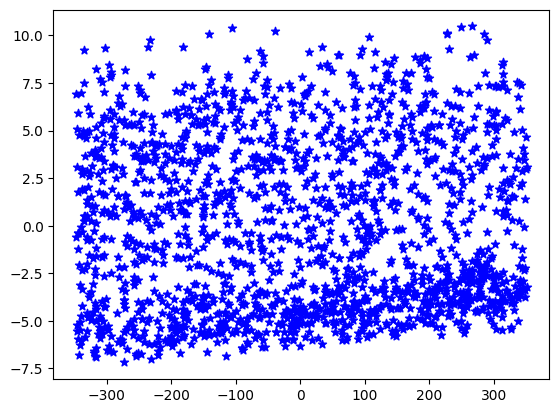

In [86]:
# Строим в соответствии с тремя классами
for i in range(0, pca_2d.shape[0]):
    if dbscan.labels_[i] == 0:
        c1 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='r', marker='+')
    elif dbscan.labels_[i] == 1:
        c2 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='g', marker='o')
    elif dbscan.labels_[i] == -1:
        c3 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='b', marker='*')

plt.legend([c1, c2, c3], ['Кластер 1', 'Кластер 2', 'Шум'])
plt.title('DBSCAN нашел 2 кластера и шум')
plt.show()

In [ ]:
dbscan.labels_